In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


data, target = load_digits(return_X_y=True)

# cv=10 k=10

In [3]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
import numpy as np
data.shape

(1797, 64)

In [4]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
classifier = DecisionTreeClassifier()
cross_val_score(classifier, data, target, cv=10).mean()

In [11]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100)
cross_val_score(bagging, data, target, cv=10).mean()

0.924832402234637

In [19]:
max_features = np.sqrt(data.shape[1])
max_features

8.0

In [20]:
bagging = BaggingClassifier(n_estimators=100, max_features=int(max_features))
cross_val_score(bagging, data, target, cv=10).mean()

0.9271011793916824

In [24]:
decision_tree = DecisionTreeClassifier(splitter="random", max_features="sqrt")
bagging = BaggingClassifier(base_estimator=decision_tree, n_estimators=100)
cross_val_score(bagging, data, target, cv=10).mean()

0.9610521415270018

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_features="sqrt")
cross_val_score(random_forest, data, target, cv=10).mean()

0.9454686530105525

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
from sklearn import ensemble, model_selection, metrics 

[ 161  485  808 1131 1455]
[0.86645963 0.9028866  0.90742574 0.91635721 0.91642612]
[0.47806021 0.61382371 0.67163253 0.7038951  0.74680633]


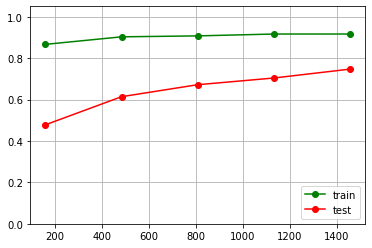

In [40]:
random_forest = RandomForestClassifier(n_estimators=1, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

[ 161  485  808 1131 1455]
[0.99006211 0.99298969 0.99418317 0.99301503 0.99505155]
[0.66166667 0.77348852 0.82410304 0.83416201 0.86812539]


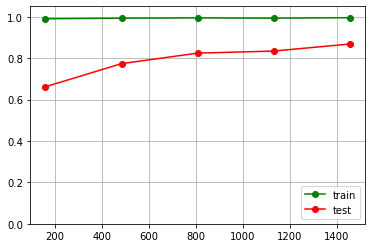

In [41]:
random_forest = RandomForestClassifier(n_estimators=5, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

[ 161  485  808 1131 1455]
[1.         0.99938144 0.99925743 0.99964633 0.99965636]
[0.69280571 0.84588144 0.87311297 0.90816884 0.91094351]


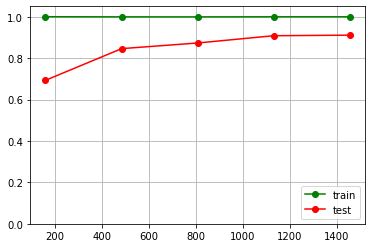

In [42]:
random_forest = RandomForestClassifier(n_estimators=10, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

[ 161  485  808 1131 1455]
[1. 1. 1. 1. 1.]
[0.77351645 0.88984482 0.91761639 0.93709808 0.94322781]


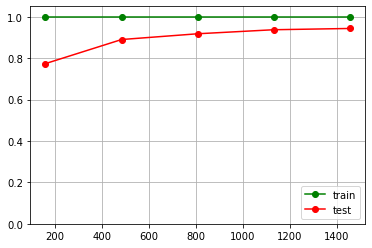

In [43]:
random_forest = RandomForestClassifier(n_estimators=50, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

[ 161  485  808 1131 1455]
[0.99751553 0.98824742 0.98341584 0.97427056 0.9657732 ]
[0.764072   0.84366232 0.88811918 0.902036   0.90315022]


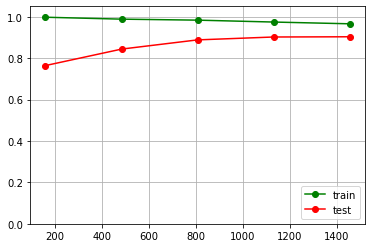

In [44]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=5, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

[ 161  485  808 1131 1455]
[1. 1. 1. 1. 1.]
[0.77739603 0.8909311  0.91539417 0.93154562 0.94155493]


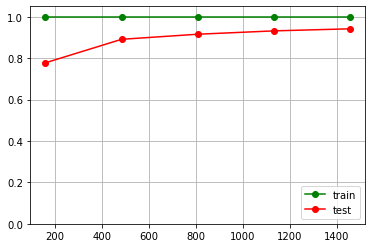

In [45]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=15, max_features="sqrt")
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, data, target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')